In [1]:
import pandas as pd

# Load the dataset
file_path = "/content/UberDataset.csv"
df = pd.read_csv(file_path)

# Display basic information
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


(None,
          START_DATE          END_DATE  CATEGORY        START             STOP  \
 0  01-01-2016 21:11  01-01-2016 21:17  Business  Fort Pierce      Fort Pierce   
 1  01-02-2016 01:25  01-02-2016 01:37  Business  Fort Pierce      Fort Pierce   
 2  01-02-2016 20:25  01-02-2016 20:38  Business  Fort Pierce      Fort Pierce   
 3  01-05-2016 17:31  01-05-2016 17:45  Business  Fort Pierce      Fort Pierce   
 4  01-06-2016 14:42  01-06-2016 15:49  Business  Fort Pierce  West Palm Beach   
 
    MILES          PURPOSE  
 0    5.1   Meal/Entertain  
 1    5.0              NaN  
 2    4.8  Errand/Supplies  
 3    4.7          Meeting  
 4   63.7   Customer Visit  )

In [2]:
# Convert date columns to datetime
df['START_DATE'] = pd.to_datetime(df['START_DATE'], errors='coerce')
df['END_DATE'] = pd.to_datetime(df['END_DATE'], errors='coerce')

# Extract time features
df['DATE'] = df['START_DATE'].dt.date
df['WEEKDAY'] = df['START_DATE'].dt.day_name()
df['HOUR'] = df['START_DATE'].dt.hour
df['MONTH'] = df['START_DATE'].dt.month_name()

# Check for missing values and duplicates
missing_values = df.isnull().sum()
duplicates = df.duplicated().sum()

df_cleaned = df.dropna(subset=['START_DATE', 'CATEGORY', 'START', 'STOP'])

missing_values, duplicates, df_cleaned.shape


(START_DATE    735
 END_DATE      736
 CATEGORY        1
 START           1
 STOP            1
 MILES           0
 PURPOSE       503
 DATE          735
 WEEKDAY       735
 HOUR          735
 MONTH         735
 dtype: int64,
 np.int64(56),
 (421, 11))

<ipython-input-3-9b49ffdfee6e>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='WEEKDAY', order=order, palette="Set2")


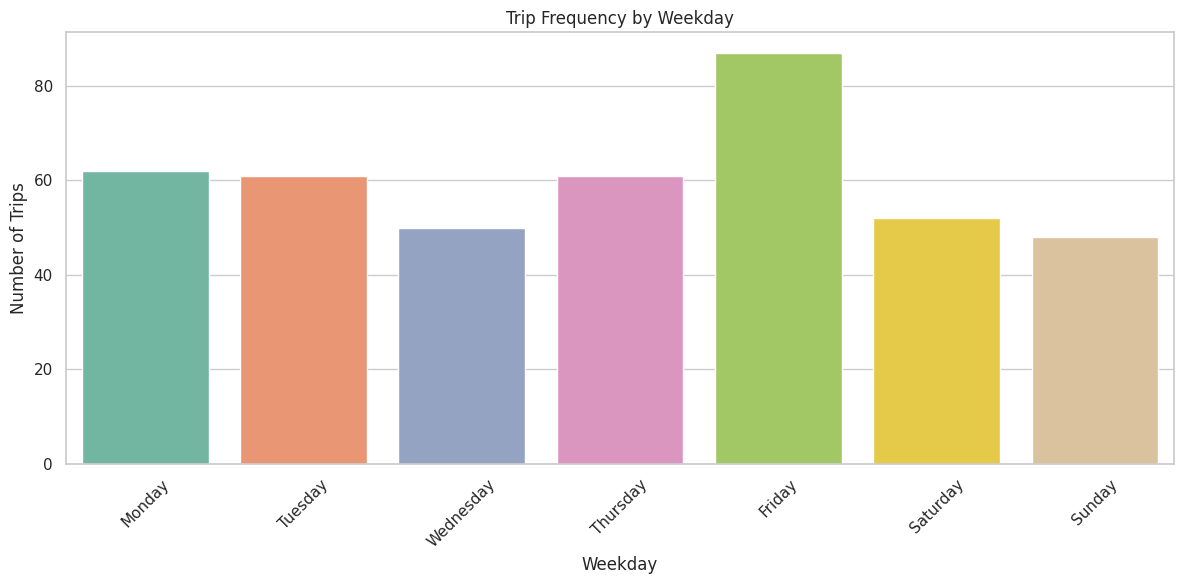

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Plot trip count by weekday
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(data=df_cleaned, x='WEEKDAY', order=order, palette="Set2")

plt.title("Trip Frequency by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Number of Trips")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-4-64fe388db427>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='HOUR', palette="viridis")


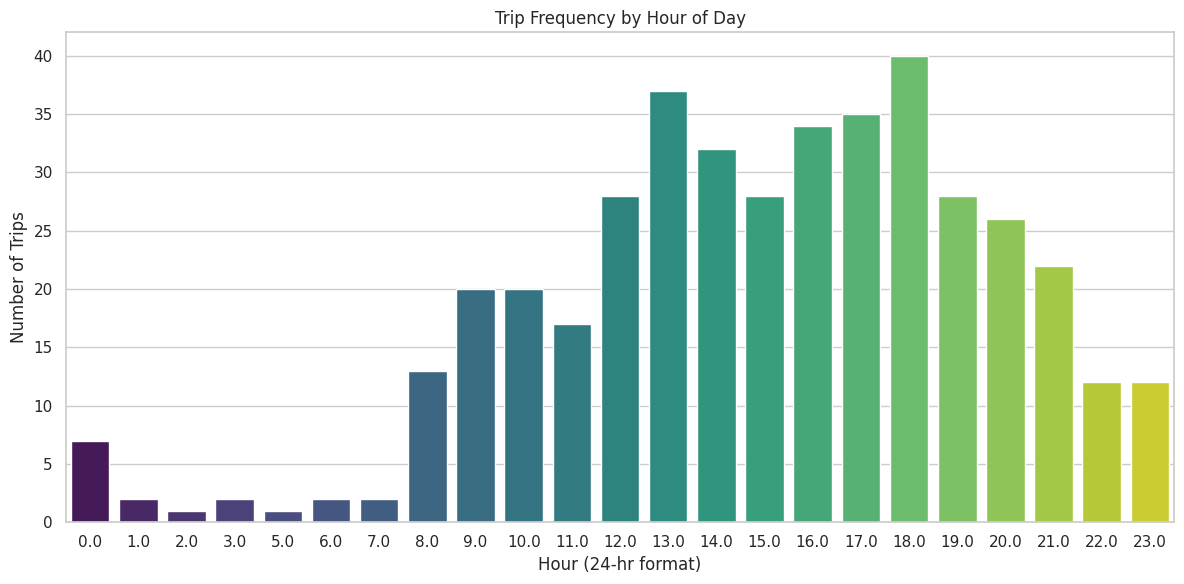

In [4]:
plt.figure(figsize=(12, 6))

# Plot trip count by hour
sns.countplot(data=df_cleaned, x='HOUR', palette="viridis")

plt.title("Trip Frequency by Hour of Day")
plt.xlabel("Hour (24-hr format)")
plt.ylabel("Number of Trips")
plt.tight_layout()
plt.show()


<ipython-input-5-f6e450b5f631>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=business_trips, y='PURPOSE', order=business_trips['PURPOSE'].value_counts().index, palette='pastel')


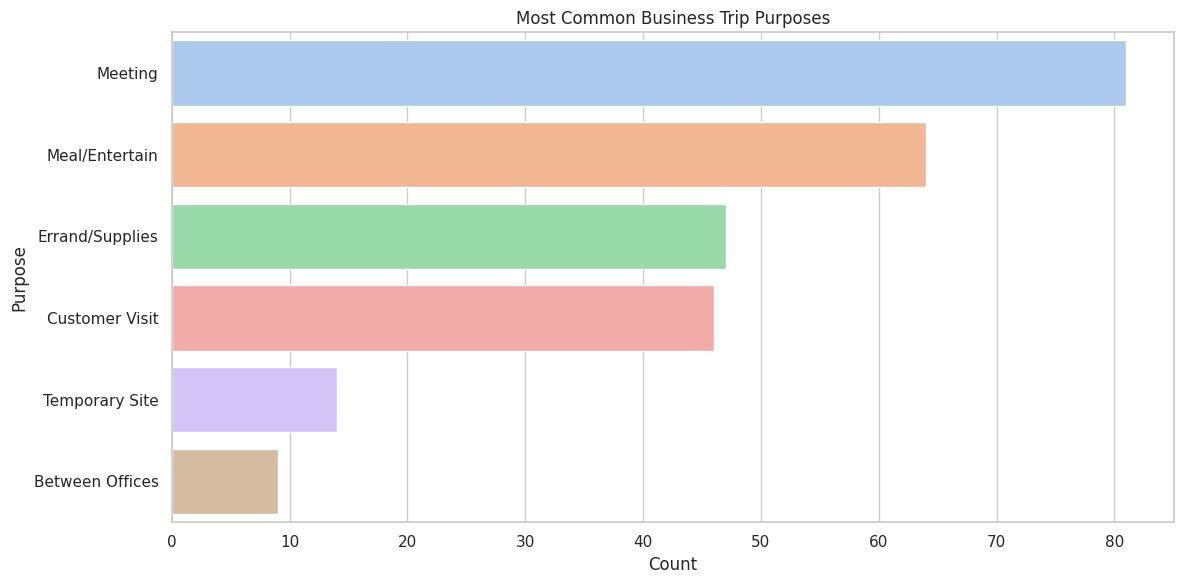

In [5]:
#Purpose of trips


# Filter only business category trips with known purpose
business_trips = df_cleaned[(df_cleaned['CATEGORY'] == 'Business') & (df_cleaned['PURPOSE'].notna())]

# Countplot of trip purposes
plt.figure(figsize=(12,6))
sns.countplot(data=business_trips, y='PURPOSE', order=business_trips['PURPOSE'].value_counts().index, palette='pastel')
plt.title('Most Common Business Trip Purposes')
plt.xlabel('Count')
plt.ylabel('Purpose')
plt.tight_layout()
plt.show()


<ipython-input-6-8fb6a8cfb970>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_starts.values, y=top_starts.index, palette='Blues_r')


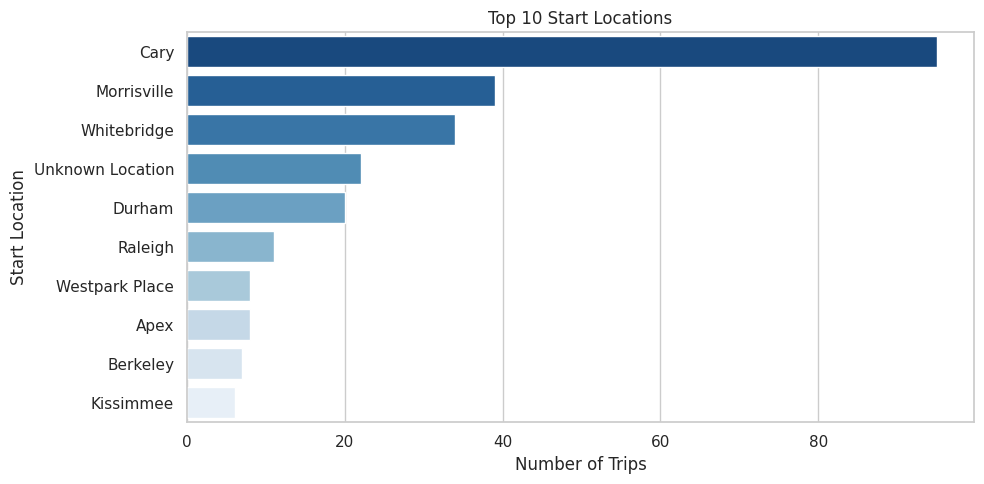

In [6]:
#most frequest start and stop location
# Top 10 start locations
top_starts = df_cleaned['START'].value_counts().head(10)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=top_starts.values, y=top_starts.index, palette='Blues_r')
plt.title("Top 10 Start Locations")
plt.xlabel("Number of Trips")
plt.ylabel("Start Location")
plt.tight_layout()
plt.show()


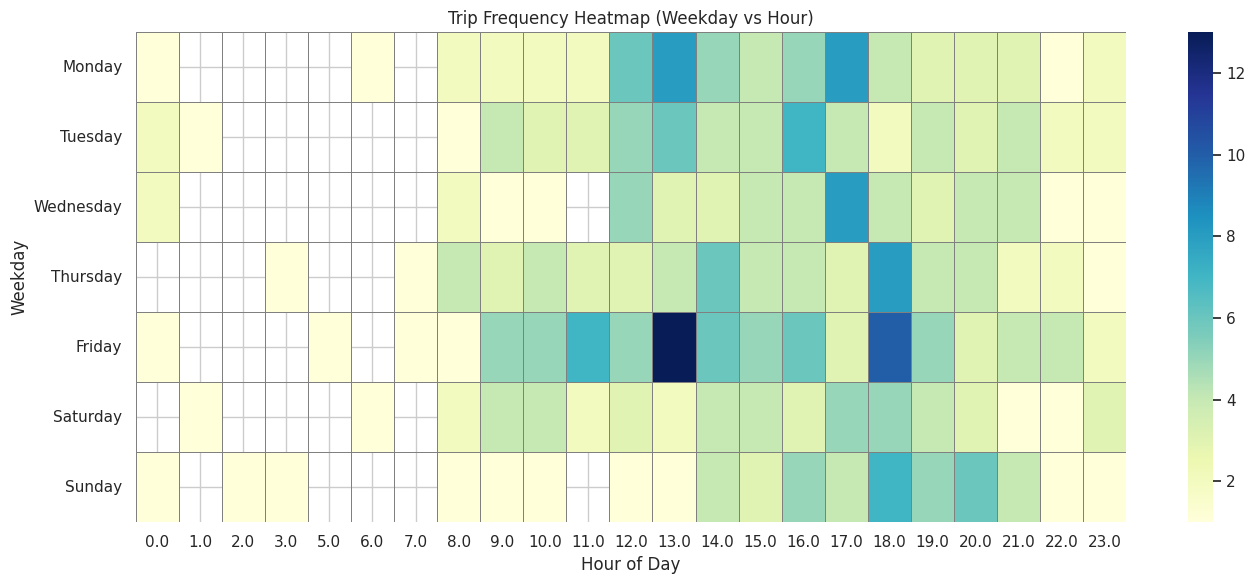

In [7]:
#when does most trip happens
# Pivot table for heatmap
heatmap_data = df_cleaned.pivot_table(index='WEEKDAY', columns='HOUR', values='MILES', aggfunc='count')

# Reorder weekdays
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(ordered_days)

# Heatmap
plt.figure(figsize=(14,6))
sns.heatmap(heatmap_data, cmap='YlGnBu', linewidths=0.5, linecolor='gray')
plt.title('Trip Frequency Heatmap (Weekday vs Hour)')
plt.xlabel('Hour of Day')
plt.ylabel('Weekday')
plt.tight_layout()
plt.show()


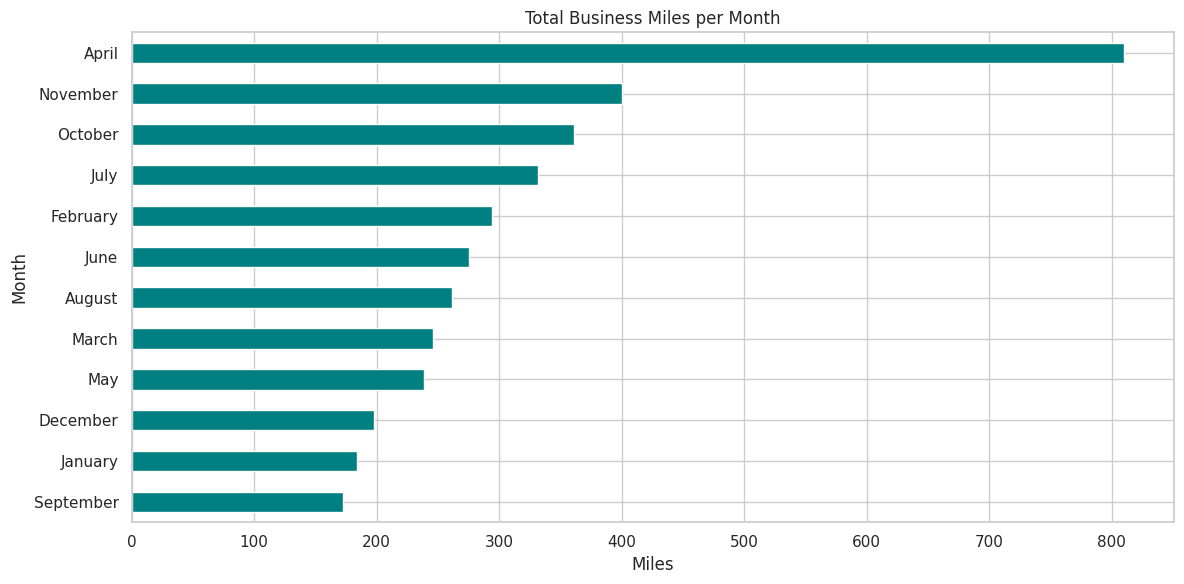

In [8]:
#highest milage month
monthly_mileage = df_cleaned[df_cleaned['CATEGORY'] == 'Business'].groupby('MONTH')['MILES'].sum().sort_values()

plt.figure(figsize=(12,6))
monthly_mileage.plot(kind='barh', color='teal')
plt.title("Total Business Miles per Month")
plt.xlabel("Miles")
plt.ylabel("Month")
plt.tight_layout()
plt.show()


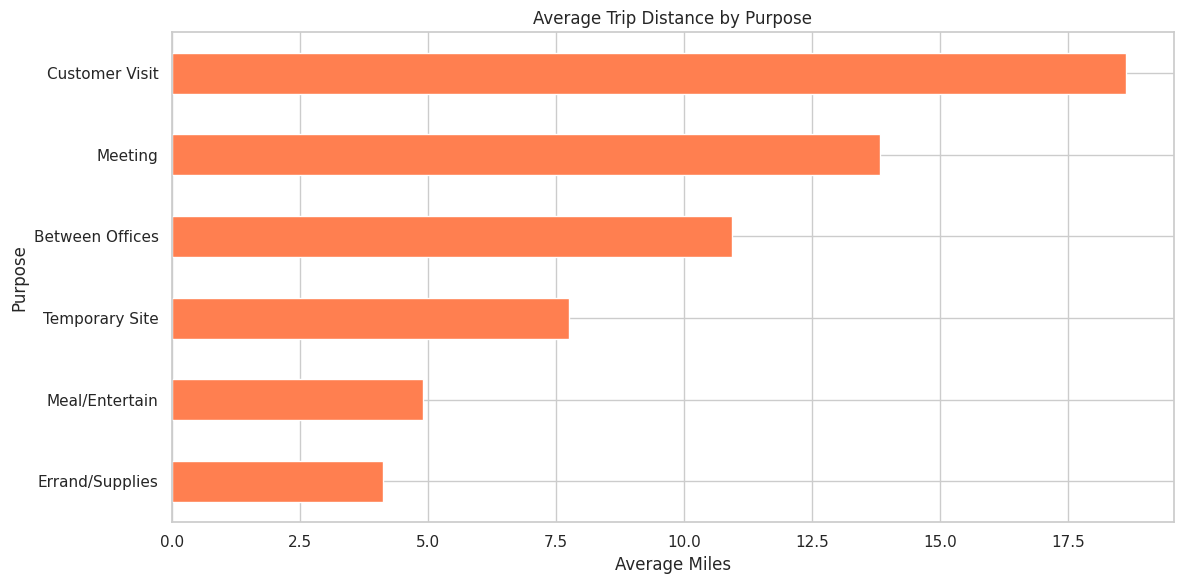

In [9]:
#avg distance tips by purpose
avg_miles_by_purpose = business_trips.groupby('PURPOSE')['MILES'].mean().sort_values()

plt.figure(figsize=(12,6))
avg_miles_by_purpose.plot(kind='barh', color='coral')
plt.title("Average Trip Distance by Purpose")
plt.xlabel("Average Miles")
plt.ylabel("Purpose")
plt.tight_layout()
plt.show()
